In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math 
import copy 
import sys 

In [2]:
# -------fitness functions---------

# rastrigin function
def fitness_rastrigin(position):
    fitness_value = 0.0
    for i in range(len(position)):
        xi = position[i]
        fitness_value += (xi * xi) - (10 * math.cos(2 * math.pi * xi)) + 10
    return fitness_value


# sphere function
def fitness_sphere(position):
    fitness_value = 0.0
    for i in range(len(position)):
        xi = position[i]
        fitness_value += (xi * xi);
    return fitness_value;


# Three-hump camel function 2*(x*2))-(1.05(x*4))+((x6)/6)+(x*y)+(y*2)
def Three_hump (position):
    x = position[0]
    y = position[1]
    fitness_value = (2*(x**2)) - (1.05*(x**4)) + ((x**6)/6) + (x*y)+(y**2)
    
    return fitness_value

#Beale function

def Beale (position):
    x = position[0]
    y = position[1]
    fitness_value = (1.5 -x + x*y )**2 + (2.25- x+ x*(y**2) )**2 + (2.625 - x + x*(y**3))**2
    
    return fitness_value

# test function
def fitness_test(position):
    fitness_value = (position[0]-2)**2+(position[1]-4)**2 + (position[2]-3)**2
    return fitness_value;


# -------------------------


# whale class
class whale:
    def __init__(self, fitness, dim, minx, maxx, seed):
        self.rnd = random.Random(seed)
        self.position = [0.0 for i in range(dim)]

        for i in range(dim):
            self.position[i] = ((maxx - minx) * self.rnd.random() + minx)

        self.fitness = fitness(self.position) # curr fitness


# whale optimization algorithm(WOA)
def woa(fitness, max_iter, n, dim, minx, maxx):
    rnd = random.Random(0)
    # position_list = np.zeros((max_iter+1,dim))
    position_list=[]
    fitness_list=[]
    whalePop_list=[]

    # create n random whales
    whalePopulation = [whale(fitness, dim, minx, maxx, i) for i in range(n)]
    whalePop_list.append([p.position for p in whalePopulation])
    # compute the value of best_position and best_fitness in the whale Population

    Xbest = [0.0 for i in range(dim)]
    Fbest = sys.float_info.max

    for i in range(n): # check each whale
        if whalePopulation[i].fitness < Fbest:
            Fbest = whalePopulation[i].fitness
            Xbest = copy.copy(whalePopulation[i].position)

    # position_list[0]= Xbest
    position_list.append(Xbest)
    fitness_list.append(Fbest)

    # main loop of woa
    for Iter in range(max_iter):
        # after every 10 iterations
        # print iteration number and best fitness value so far
        if Iter % 10 == 0 and Iter > 1:
            print("Iter = " + str(Iter) + " best fitness = %.3f" % Fbest)

        # linearly decreased from 2 to 0
        a = 2 * (1 - Iter / max_iter)
        a2=-1+Iter*((-1)/max_iter)

        for i in range(n):
            A = 2 * a * rnd.random() - a
            C = 2 * rnd.random()
            b = 1
            l = (a2-1)*rnd.random()+1;
            p = rnd.random()

            D = [0.0 for i in range(dim)]
            D1 = [0.0 for i in range(dim)]
            Xnew = [0.0 for i in range(dim)]
            Xrand = [0.0 for i in range(dim)]
            if p < 0.5:
                if abs(A) < 1:
                    for j in range(dim):
                        D[j] = abs(C * Xbest[j] - whalePopulation[i].position[j])
                        Xnew[j] = Xbest[j] - A * D[j]
                else:
                    p = random.randint(0, n - 1)
                    while (p == i):
                        p = random.randint(0, n - 1)

                    Xrand = whalePopulation[p].position

                    for j in range(dim):
                        D[j] = abs(C * Xrand[j] - whalePopulation[i].position[j])
                        Xnew[j] = Xrand[j] - A * D[j]
            else:
                for j in range(dim):
                    D1[j] = abs(Xbest[j] - whalePopulation[i].position[j])
                    Xnew[j] = D1[j] * math.exp(b * l) * math.cos(2 * math.pi * l) + Xbest[j]

            for j in range(dim):
                whalePopulation[i].position[j] = Xnew[j]

        for i in range(n):

            # if Xnew < minx OR Xnew > maxx
            # then clip it
            for j in range(dim):
                whalePopulation[i].position[j] = max(whalePopulation[i].position[j], minx)
                whalePopulation[i].position[j] = min(whalePopulation[i].position[j], maxx)

            whalePopulation[i].fitness = fitness(whalePopulation[i].position)

            if (whalePopulation[i].fitness < Fbest):
                Xbest = copy.copy(whalePopulation[i].position)
                Fbest = whalePopulation[i].fitness

        # position_list[i]= Xbest
        position_list.append(Xbest)
        fitness_list.append(Fbest)
        whalePop_list.append([p.position for p in whalePopulation])

            
    # end-for
    # returning the best solution
    return Xbest ,position_list,fitness_list,whalePop_list


# ----------------------------


# Driver code for rastrigin function
print("\nBegin whale optimization algorithm on rastrigin function\n")
dim = 3
fitness = fitness_rastrigin
# minx = -10
# maxx = 10

print("Goal is to minimize function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (", end="")
for i in range(dim - 1):
	print("0, ", end="")
print("0)")

num_whales = 50
max_iter = 100

print("Setting num_whales = " + str(num_whales))
print("Setting max_iter = " + str(max_iter))
print("\nSWOA algorithm for Sphere function\n")

best_position,position_list1 ,fitness_list1,whalePop_list1= woa(fitness, max_iter, num_whales, dim,-10,10)

print("\nWOA completed\n")
print("\nBest solution found:")
print(["%.6f" % best_position[k] for k in range(dim)])
err = fitness(best_position)
print("fitness of best solution = %.6f" % err)

print("\n================================================================================\n")

# Driver code for Sphere function

print("\nWOA algorithm for Sphere function\n")

print("Function has known min = 0.0 at (", end="")
for i in range(dim - 1):
    print("0, ", end="")
print("0)")

dim = 3
fitness = fitness_sphere

best_position,position_list2 ,fitness_list2 ,whalePop_list2= woa(fitness, max_iter, num_whales, dim, -100,100)

print("\nWOA completed\n")
print("\nBest solution found:")
print(["%.6f" % best_position[k] for k in range(dim)])
err = fitness(best_position)
print("fitness of best solution = %.6f" % err)

print("\n===============================================================================\n")
# Driver code for Three_hump camel function

print("\nWOA algorithm for Beale function\n")
print("Function has known min = 0.0 at (0,0)")
fitness = Three_hump
dim = 2

best_position,position_list3,fitness_list3,whalePop_list3= woa(fitness, max_iter, num_whales, dim, -5.0, 5.0)

print("\nWOA completed\n")
print("\nBest solution found:")
print(["%.6f" % best_position[k] for k in range(dim)])
err = fitness(best_position)
print("fitness of best solution = %.6f" % err)

print("\n====================================================================\n")

# Driver code for Beale camel function

print("\nWOA algorithm for Beale function\n")
print("Function has known min = 0.0 at (3,0.5)")
fitness = Beale
dim = 2

best_position,position_list5,fitness_list5,whalePop_list5= woa(fitness, max_iter, num_whales, dim, -5.0, 5.0)

print("\nWOA completed\n")
print("\nBest solution found:")
print(["%.6f" % best_position[k] for k in range(dim)])
err = fitness(best_position)
print("fitness of best solution = %.6f" % err)

print("\n====================================================================\n")
# Driver code for test function

# print("\nWOA algorithm for test function\n")
# print("Function has known min = 0.0 at (2,4,3)")
# fitness = fitness_test
# dim = 3
# best_position,position_list4,fitness_list4,whalePop_list4= woa(fitness, max_iter, num_whales, dim, -100.0, 100.0)

# print("\nWOA completed\n")
# print("\nBest solution found:")
# print(["%.6f" % best_position[k] for k in range(dim)])
# err = fitness(best_position)
# print("fitness of best solution = %.6f" % err)

# print("\n====================================================================\n")



Begin whale optimization algorithm on rastrigin function

Goal is to minimize function in 3 variables
Function has known min = 0.0 at (0, 0, 0)
Setting num_whales = 50
Setting max_iter = 100

SWOA algorithm for Sphere function

Iter = 10 best fitness = 2.193
Iter = 20 best fitness = 0.431
Iter = 30 best fitness = 0.002
Iter = 40 best fitness = 0.000
Iter = 50 best fitness = 0.000
Iter = 60 best fitness = 0.000
Iter = 70 best fitness = 0.000
Iter = 80 best fitness = 0.000
Iter = 90 best fitness = 0.000

WOA completed


Best solution found:
['0.000000', '-0.000000', '-0.000000']
fitness of best solution = 0.000000



WOA algorithm for Sphere function

Function has known min = 0.0 at (0, 0, 0)
Iter = 10 best fitness = 0.792
Iter = 20 best fitness = 0.014
Iter = 30 best fitness = 0.000
Iter = 40 best fitness = 0.000
Iter = 50 best fitness = 0.000
Iter = 60 best fitness = 0.000
Iter = 70 best fitness = 0.000
Iter = 80 best fitness = 0.000
Iter = 90 best fitness = 0.000

WOA completed


Bes

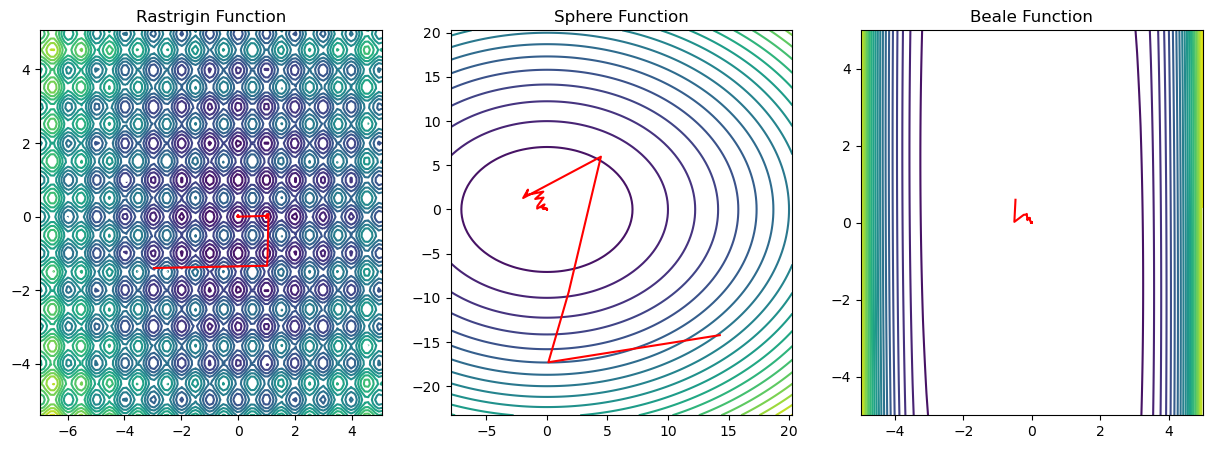

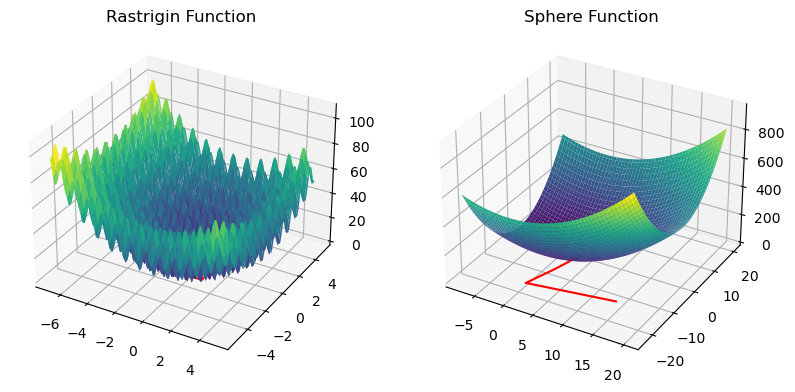

In [3]:
def rastrigin(x, y):
    return 20 + x**2 - 10*np.cos(2*np.pi*x) + y**2 - 10*np.cos(2*np.pi*y)

def sphere(x, y):
    return x**2 + y**2


def ThreeHump (x, y):
    return (2*(x**2)) - (1.05*(x**4)) + ((x**6)/6) + (x*y)+(y**2)

def Beale(x,y):
    return (1.5 -x + x*y )**2 + (2.25- x+ x*(y**2) )**2 + (2.625 - x + x*(y**3))**2

# (position[0]-2)**2+(position[1]-4)**2
def test_fun(x, y):
    return (x-2)**2+(y-4)**2

# 2D plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig3 = plt.figure(figsize=(15, 5))
# -------------------------------------------------- Rastrigin Function--------------------
#1
# 2D plots
x_up =[ i[0] for i in position_list1 ]
y_up=[ i[1] for i in position_list1]
z_up=[ i[2] for i in position_list1 ]
xmax = max(x_up)
ymax = max(y_up)
xmin = min(x_up)
ymin = min(y_up)
x = np.linspace(xmin-4,xmax +4 , 100)
y = np.linspace(ymin-4,xmax +4, 100)
X, Y = np.meshgrid(x, y)
axs[0].contour(X, Y, rastrigin(X, Y), levels=20)
axs[0].plot(x_up, y_up,color = 'r')
axs[0].set_title("Rastrigin Function")
axs[0].set_xlabel('')

# 3D plots
ax = fig3.add_subplot(131, projection='3d')
ax.plot_surface(X, Y, rastrigin(X, Y), cmap='viridis')
ax.plot(x_up, y_up,z_up,color = 'r')
ax.set_title("Rastrigin Function")


# --------------------------------------------- Sphere Function --------------------
# 2
x_up =[ i[0] for i in position_list2]
y_up=[ i[1] for i in position_list2]
z_up=[ i[2] for i in position_list2]
xmax = max(x_up)
ymax = max(y_up)
xmin = min(x_up)
ymin = min(y_up)
x = np.linspace(xmin-6,xmax +6 , 100)
y = np.linspace(ymin-6,xmax +6, 100)
X, Y = np.meshgrid(x, y)
axs[1].contour(X, Y, sphere(X, Y), levels=20)
axs[1].plot(x_up, y_up,color = 'r')
axs[1].set_title("Sphere Function")
# 3D plots
ax = fig3.add_subplot(132, projection='3d')
ax.plot_surface(X, Y, sphere(X, Y), cmap='viridis')
ax.plot(x_up, y_up,z_up,color = 'r')
ax.set_title("Sphere Function")
# --------------------------------------------- Beale_2D --------------------
# 3
x_up =[ i[0] for i in position_list3]
y_up=[ i[1] for i in position_list3]
# z_up=[ i[2] for i in position_list3]
xmax = max(x_up)
ymax = max(y_up)
xmin = min(x_up)
ymin = min(y_up)
x = np.linspace(-5,5 , 100)
y = np.linspace(-5,5, 100)
X, Y = np.meshgrid(x, y)

axs[2].contour(X, Y, ThreeHump(X, Y), levels=20)
axs[2].plot(x_up, y_up,color = 'r')
axs[2].set_title("Beale Function")

# 3D plots
# ax = fig3.add_subplot(133, projection='3d')
# ax.plot_surface(X, Y, ThreeHump(X, Y), cmap='viridis')
# ax.set_title("Beale Function")
# ax.plot(x_up, y_up,color = 'r')



plt.show()

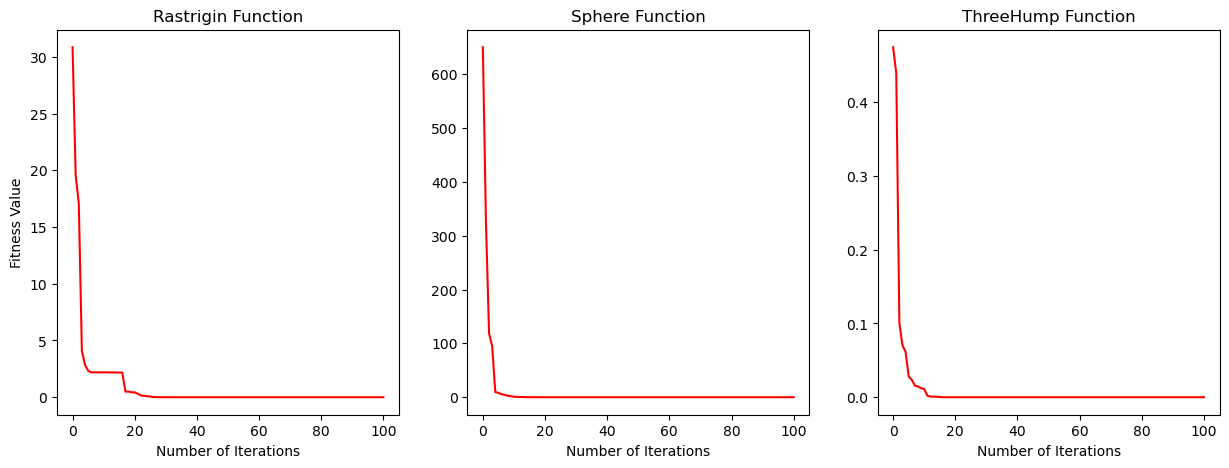

In [4]:
# fitness 

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(fitness_list1,color = 'r')
axs[0].set_title("Rastrigin Function")
axs[0].set_ylabel('Fitness Value')
axs[0].set_xlabel('Number of Iterations')


axs[1].plot(fitness_list2,color = 'r')
axs[1].set_title("Sphere Function")
# axs[1].set_xlabel('Fitness Value')
axs[1].set_xlabel('Number of Iterations')


axs[2].plot(fitness_list3,color = 'r')
axs[2].set_title("ThreeHump Function")
# axs[2].set_xlabel('Fitness Value')
axs[2].set_xlabel('Number of Iterations')

plt.show()

In [5]:
from matplotlib.widgets import Cursor
%matplotlib qt

In [7]:
def rastrigin(x, y):
    return 20 + x**2 - 10*np.cos(2*np.pi*x) + y**2 - 10*np.cos(2*np.pi*y)

def sphere(x, y):
    return x**2 + y**2


def Beale(x,y):
    return (1.5 -x + x*y )**2 + (2.25- x+ x*(y**2) )**2 + (2.625 - x + x*(y**3))**2

# (position[0]-2)**2+(position[1]-4)**2
def test_fun(x, y):
    return (x-2)**2+(y-4)**2

# 2D plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# fig3 = plt.figure(figsize=(15, 5))
# -------------------------------------------------- Rastrigin Function--------------------
#1
# 2D plots
x_up =[ i[0] for i in position_list1 ]
y_up=[ i[1] for i in position_list1]
z_up=[ i[2] for i in position_list1 ]
xmax = max(x_up)
ymax = max(y_up)
xmin = min(x_up)
ymin = min(y_up)
x = np.linspace(xmin-4,xmax +4 , 100)
y = np.linspace(ymin-4,xmax +4, 100)
X, Y = np.meshgrid(x, y)
axs[0].contour(X, Y, rastrigin(X, Y), levels=20)
# axs[0].plot(x_up, y_up,color = 'r')
axs[0].set_title("Rastrigin Function")



# --------------------------------------------- Sphere Function --------------------
# 2
x_up =[ i[0] for i in position_list2]
y_up=[ i[1] for i in position_list2]
z_up=[ i[2] for i in position_list2]
xmax = max(x_up)
ymax = max(y_up)
xmin = min(x_up)
ymin = min(y_up)
x = np.linspace(xmin-6,xmax +6 , 100)
y = np.linspace(ymin-6,xmax +6, 100)
X, Y = np.meshgrid(x, y)
axs[1].contour(X, Y, sphere(X, Y), levels=20)
axs[1].set_title("Sphere Function")


# --------------------------------------------- test_fun_2D --------------------
# 3
x_up =[ i[0] for i in position_list3]
y_up=[ i[1] for i in position_list3]
# z_up=[ i[2] for i in position_list3]
xmax = max(x_up)
ymax = max(y_up)
xmin = min(x_up)
ymin = min(y_up)
x = np.linspace(-5,5 , 100)
y = np.linspace(-5,5, 100)
X, Y = np.meshgrid(x, y)

axs[2].contour(X, Y, ThreeHump(X, Y), levels=20)
axs[2].set_title("Three Hump Function")






x1 = []
y1 = []
p_x, p_y = position_list1[0][0] , position_list1[0][1]
x1.append(p_x)
y1.append(p_y)
Rast_plot = axs[0].plot(x1, y1, color = 'r')

x2 = []
y2 = []
p_x, p_y = position_list2[0][0] , position_list2[0][1]
x2.append(p_x)
y2.append(p_y)
Sphere_plot = axs[1].plot(x2, y2, color = 'r')

x3 = []
y3 = []
p_x, p_y = position_list3[0][0] , position_list3[0][1]
x3.append(p_x)
y3.append(p_y)
Beale_plot = axs[2].plot(x3, y3, color = 'r')

for i in range(len(position_list1)-40):
        p_x, p_y = position_list1[i][0] , position_list1[i][1]
        x1.append(p_x)
        y1.append(p_y)  
        plt.setp(Rast_plot, xdata = x1, ydata = y1)
        
        p_x, p_y = position_list2[i][0] , position_list2[i][1]
        x2.append(p_x)
        y2.append(p_y)  
        plt.setp(Sphere_plot, xdata = x2, ydata = y2)
        p_x, p_y = position_list3[i][0] , position_list3[i][1]
        x3.append(p_x)
        y3.append(p_y)  
        plt.setp(Beale_plot, xdata = x3, ydata = y3)
        
        plt.pause(0.4)



plt.show()

In [97]:
whalePop_list1[1][2][1]

-1.529814371934649e-09

In [ ]:
[ i[0] for i in whalePop_list1]

In [103]:
for poplist in whalePop_list1:
    x, y = [ i[0] for i in poplist],[ i[1] for i in poplist]
    
    
y

[-1.5361991825926762e-09,
 -1.5200252216491218e-09,
 -1.529814371934649e-09,
 -1.5341216126492645e-09,
 -1.5388548050006666e-09,
 -1.5298771561249523e-09,
 -1.5063579845783825e-09,
 -1.5453089475229975e-09,
 -1.5335047154490143e-09,
 -1.5254785929660138e-09,
 -1.5266154605463206e-09,
 -1.5298200965510306e-09,
 -1.5232375659683074e-09,
 -1.5428697716918233e-09,
 -1.529826257879871e-09,
 -1.520006724460032e-09,
 -1.531755804514953e-09,
 -1.540808254451575e-09,
 -1.5341746670409673e-09,
 -1.5290814119786271e-09,
 -1.569816086259426e-09,
 -1.5267799380045681e-09,
 -1.5273415514641009e-09,
 -1.5326853680196525e-09,
 -1.546148725754423e-09,
 -1.5380615456980686e-09,
 -1.5253574725430457e-09,
 -1.5582185310407294e-09,
 -1.5284491638064592e-09,
 -1.5298285404834184e-09,
 -1.5278220097831381e-09,
 -1.5336267474740284e-09,
 -1.5266102668875542e-09,
 -1.5307255626295735e-09,
 -1.5345554340756835e-09,
 -1.5354579698116843e-09,
 -1.5298389080290239e-09,
 -1.529800450359983e-09,
 -1.532767354537798e

In [113]:


# x = []
# y = []
fig, ax = plt.subplots()
x, y = [ i[0] for i in whalePop_list1[0]],[ i[1] for i in whalePop_list1[0]]
# x.append(p_x)
# y.append(p_y)  
ax.scatter(x, y, color = 'r')
for poplist in whalePop_list1:
    x, y = [ i[0] for i in poplist],[ i[1] for i in poplist]
#     x.append(p_x)
#     y.append(p_y)  
    bha=ax.scatter(x,y)
    plt.draw()
    plt.pause(0.5)
    bha.remove()
        
plt.show()


KeyboardInterrupt



In [106]:
import matplotlib.animation as animation

In [112]:
fig, ax = plt.subplots()

def update(i):
    ax.clear()
    x, y = [ c[0] for c in whalePop_list1[i]],[ p[1] for p in whalePop_list1[i]]
    ax.scatter(x, y)
#     ax.set_xlim(-2, frames+2)
#     ax.set_ylim(min(y) - 1, max(y) + 1)

ani = animation.FuncAnimation(fig, update, frames=10, interval=len(whalePop_list1))
# ani.save('clear.gif', writer='pillow')

In [13]:
x = np.zeros((4,2))
# x[0] = [2,3]
# x[:,0]


In [114]:
x_up =[ i[0] for i in position_list3 ]
y_up=[ i[1] for i in position_list3 ]
z_up=[ i[2] for i in position_list3 ]
x_up[:10]

[28.56103787596541,
 31.298846751678955,
 16.338617217539664,
 18.928872152853035,
 8.29603129206505,
 3.4448090384167864,
 4.846747829320597,
 5.034576857084602,
 5.9531978217954205,
 4.470672395756417]

In [115]:
max(x_up)

31.298846751678955

In [8]:
# (position[0]-2)**2+(position[1]-4)**2
def test_fun(x, y):
    return (x-2)**2+(y-4)**2


# 2D plots
x_up =[ i[0] for i in position_list3 ]
y_up=[ i[1] for i in position_list3 ]
z_up=[ i[2] for i in position_list3 ]
xmax = max(x_up)
ymax = max(y_up)
xmin = min(x_up)
ymin = min(y_up)

x = np.linspace(xmin-10,xmax +10 , 100)
y = np.linspace(ymin-10,xmax +10, 100)
X, Y = np.meshgrid(x, y)

plt.contour(X, Y, test_fun(X, Y), levels=40)
plt.title("test_fun Function")
# plt.plot(x_up, y_up,color = 'r')

x = []
y = []
p_x, p_y = x_up[0] , y_up[0]
x.append(p_x)
y.append(p_y)  
T_plot = plt.plot(x, y, color = 'r')
for i in range(len(x_up)):
        p_x, p_y = x_up[i] , y_up[i]
        x.append(p_x)
        y.append(p_y)  
        plt.setp(T_plot, xdata = x, ydata = y)
        plt.pause(0.2)
        
plt.show()
# #3D
# fig = plt.figure(figsize=(12, 8))

# # X, Y ,Z = np.meshgrid(x, y,z)

# ax = fig.add_subplot(projection='3d')
# ax.plot_surface(X, Y, test_fun(X, Y), cmap='viridis')
# ax.plot(x_up, y_up,z_up,color = 'r')
# ax.set_title("test_fun Function")


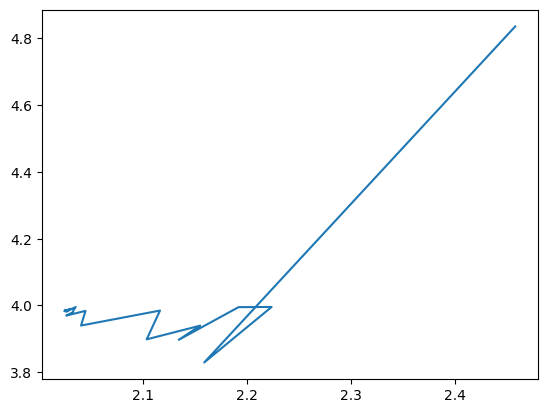

In [58]:
plt.plot(x_up, y_up)

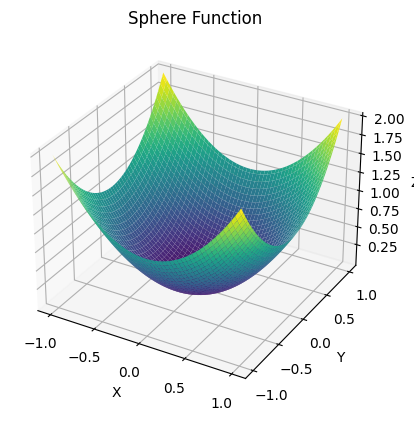

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of points
n = 100  # Number of points in each dimension
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2  # Sphere function Z = X^2 + Y^2

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')  # Plot the surface
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Sphere Function')
plt.show()


<>:5: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:5: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<ipython-input-135-924ba9df2215>:5: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  return (1-x)**2 + 100(y-x**2)**2


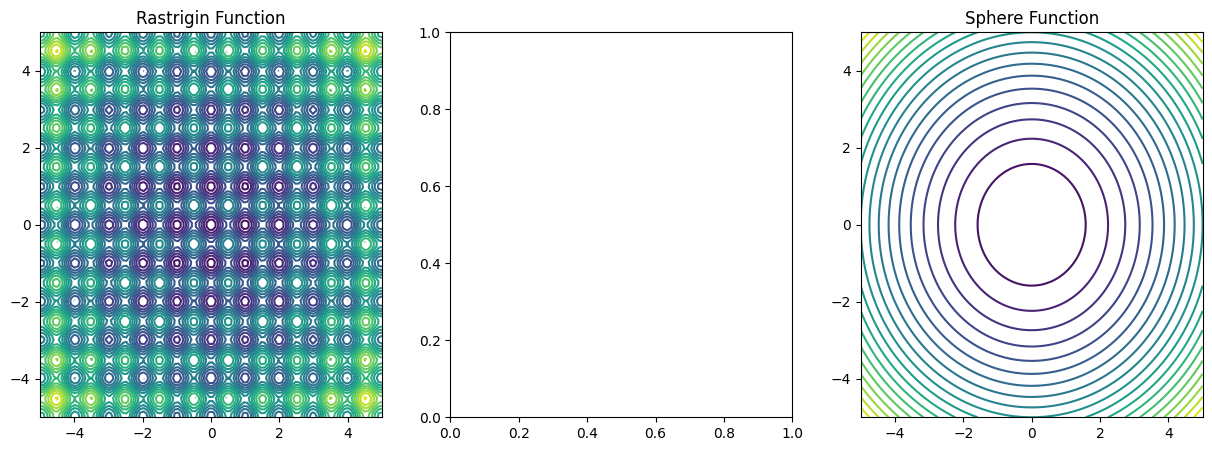

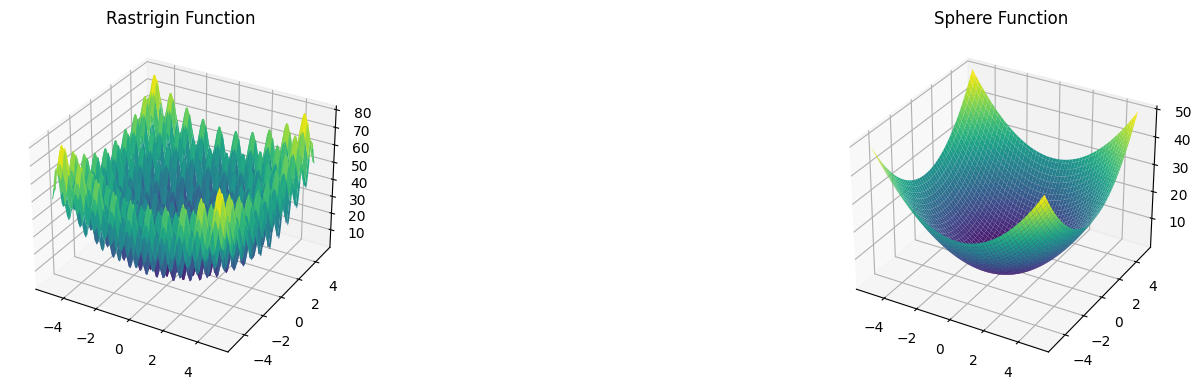

In [135]:
def rastrigin(x, y):
    return 20 + x**2 - 10*np.cos(2*np.pi*x) + y**2 - 10*np.cos(2*np.pi*y)

def rosenbrock(x, y):
    return (1-x)**2 + 100(y-x**2)**2

def sphere(x, y):
    return x**2 + y**2

# 2D plots
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].contour(X, Y, rastrigin(X, Y), levels=20)
axs[0].set_title("Rastrigin Function")
# axs[1].contour(X, Y, rosenbrock(X, Y), levels=20)
# axs[1].set_title("Rosenbrock Function")
axs[2].contour(X, Y, sphere(X, Y), levels=20)
axs[2].set_title("Sphere Function")

# 3D plots
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(X, Y, rastrigin(X, Y), cmap='viridis')
ax.set_title("Rastrigin Function")

# ax = fig.add_subplot(132, projection='3d')
# ax.plot_surface(X, Y, rosenbrock(X, Y), cmap='viridis')
# ax.set_title("Rosenbrock Function")

ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(X, Y, sphere(X, Y), cmap='viridis')
ax.set_title("Sphere Function")

plt.show()

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Create some data for the lines
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the first line
line1, = ax.plot(x, y1, label='Line 1')
plt.legend()

# Set initial limits of the axis
ax.set_xlim([0, 10])
ax.set_ylim([-1.5, 1.5])

# Draw the first line and pause
plt.draw()
plt.pause(0.2)

# Plot the second line
line2, = ax.plot(x, y2, label='Line 2')
plt.legend()

# Draw the second line and pause
plt.draw()
plt.pause(0.2)

# Plot the third line
line3, = ax.plot(x, y3, label='Line 3')
plt.legend()

# Draw the third line and pause
plt.draw()
plt.pause(0.2)

# Keep the plot open until user closes it
plt.show()
